In [157]:
#Data manipulation and analysis
import pandas as pd
import numpy as np

#Data visualization

import matplotlib.pyplot as plt
import seaborn as sns

#For statistical operation

from scipy import stats

#Preprocessing and feature scaling

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

#Machine Learning Models

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [158]:
#Load the dataset
df = pd.read_csv(r'E:\Prithvi Migration\python\Exploratory Data Analysis and Machine Learning for Heart Disease Classification\dataset\heart_disease_uci.csv')

#Display the first 5 rows of the dataset
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [159]:
#Checking for missing values

df.isnull().sum()

#Identify column with missing values

missing_values = df.isnull().sum()

columns_with_missing = missing_values[missing_values > 0]

print(columns_with_missing)




trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64


In [160]:
#1.General Information about the dataset

#How many rows and columns are there in the dataset?
#How many missing values are there in the dataset?

def general_information(df):
    print("No.of rows in the dateset:",df.shape[0])
    print("No.of columns in the dataset:",df.shape[1])
    
    print("\n Missing values in the dataset:\n",df.isnull().sum()) #Checking for missing values
    
    print("\n Columns with missing values:\n",df.isnull().sum()[df.isnull().sum() > 0]) #Identify column with missing values
general_information(df)

No.of rows in the dateset: 920
No.of columns in the dataset: 16

 Missing values in the dataset:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

 Columns with missing values:
 trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64


 Feature Analysis: num
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


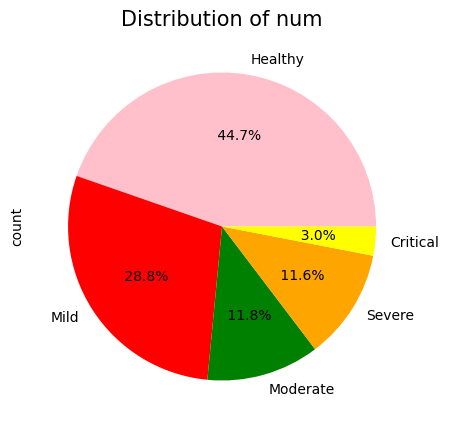

In [184]:
#Targe Variable Analysis (Heart Disease)

#1. Distribution of the target variable (Heart Disease) 0 or 1?
def analyze_target_variable(df, target_col):
    """
    it will analyze the distribution of the target variable
    
    """
    print(f"Target Variable Analysis ({target_col}):")
    print(df[target_col].value_counts())
    sns.countplot(data=df, x=target_col)
    plt.title(f"Distribution of {target_col}")
    plt.show()
    
def distribution_plot(df, Dict):
    """
    Analyzes the counts of categorical features with customizable labels.
    
    Parameters:
    - df (DataFrame): The input DataFrame.
    - labels_dict (dict): A dictionary mapping column names to their corresponding labels.
                          Format: {'column_name': ['Label1', 'Label2', ...]}
    """
    for col, labels in Dict.items():
        print(f" Feature Analysis: {col}")
        counts = df[col].value_counts()
        print(counts)
        
        # Ensure the number of labels matches the unique values in the column
        if len(labels) != len(counts):
            raise ValueError(f"Mismatch between labels provided and unique values in column '{col}'.")
        
        plt.figure(figsize=(6, 5))
        counts.plot.pie(autopct="%5.1f%%", colors=['pink','red','green', 'orange', 'yellow'][:len(counts)], labels=labels)
        plt.title(f"Distribution of {col}", fontsize=15)
        plt.show()
ddict = {
    'num': ['Healthy','Mild','Moderate','Severe','Critical']
}

distribution_plot(df,ddict)


Not Affected    411
Affected        509
dtype: int64


<Axes: >

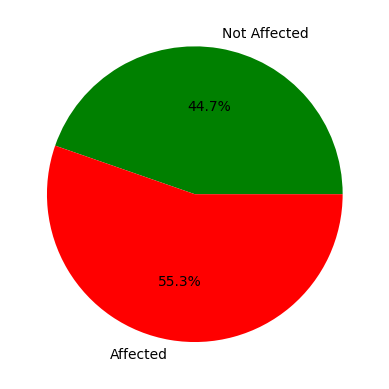

In [195]:
#2.How many people have heart disease and how many do not have heart disease?

# Get the value counts of the 'num' column
x = df['num'].value_counts()

# Calculate the affected count (excluding the first category)
affected = x[1:].sum()

# Create a Series with 'Not Affected' and 'Affected' as indices
x = pd.Series([x[0], affected], index=['Not Affected', 'Affected'])

# Print the result
print(x)

# Plot the pie chart
x.plot.pie(autopct="%1.1f%%", colors=['green', 'red'], labels=['Not Affected', 'Affected'])


Demographic insights:
Age Range of Patients in the dataset: 28 - 77


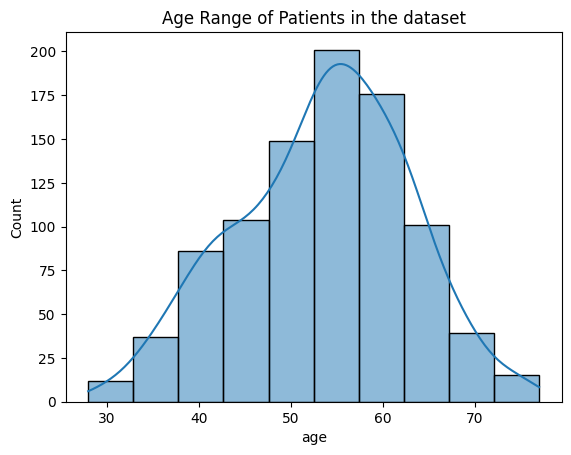

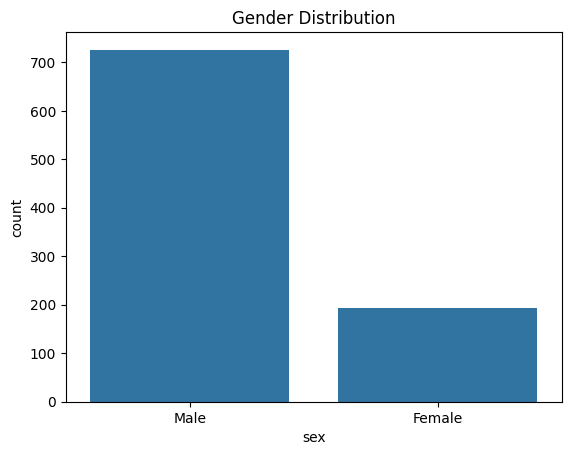

In [206]:
#Demographic Insgihts


#1. What is the age range of patients in the dataset?

def age_range(df,age_col,title):
    print("Demographic insights:")
    print(f"Age Range of Patients in the dataset: {df[age_col].min()} - {df[age_col].max()}") #Age range of patients in the dataset
    
    sns.histplot(data=df, x=age_col, kde=True, bins = 10) #kde is kernel density estimate which is used to plot the probability density of a continuous variable
    plt.title(title) #bins is interval
    plt.show()

age_range(df,'age','Age Range of Patients in the dataset')


df['sex'].value_counts()
sns.countplot(data=df,x='sex')

#sns.histplot(data=df['sex'], kde=False )
plt.title('Gender Distribution')
plt.show()

Health Metrics:
Average  of chol: 199.13 mg/dl
Median of  chol: 223.0




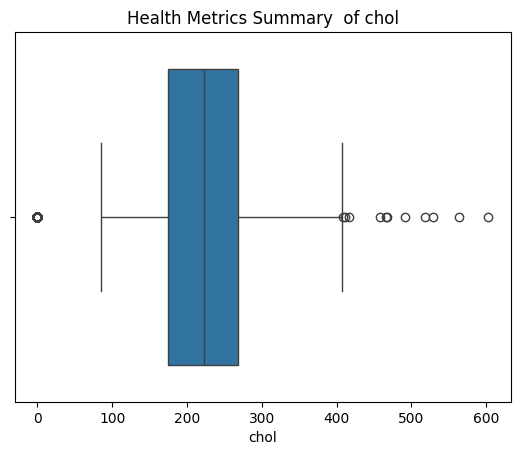

Average  of thalch: 137.55 mg/dl
Median of  thalch: 140.0




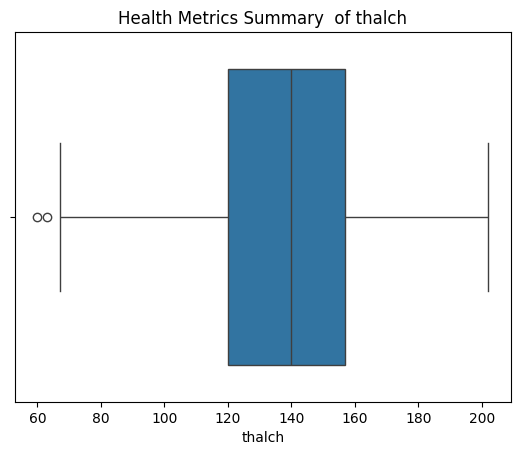

Average  of trestbps: 132.13 mg/dl
Median of  trestbps: 130.0




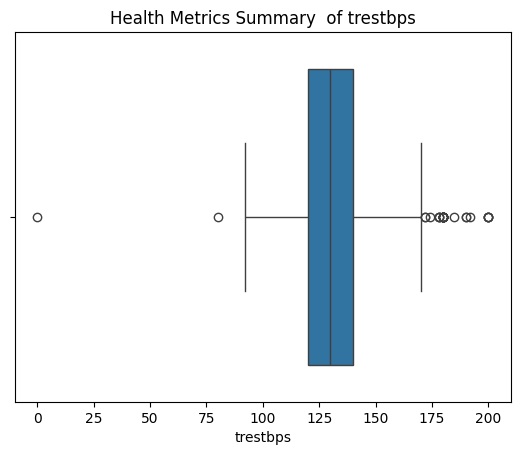

In [238]:
#Health Metrics

#1.What are the average and median value of : cholesterol(hol), max_heart_rate(thal), resting_blood_pressure(trestbps)?

def metrics_summary(df, metrics):
    
    print("Health Metrics:")
    for data in metrics:
        print(f"Average  of {data}:", df[data].mean().round(2),"mg/dl")
        print(f"Median of  {data}:", df[data].median())
        print("\n")
        sns.boxplot(x=df[data],orient='h')
        plt.title(f"Health Metrics Summary  of {data}")
        plt.show()
  
    
metrics_summary(df, ['chol', 'thalch', 'trestbps'])



In [239]:
#2.Outliers Detection
#Outliers are the data points that are significantly different from the other data points in the dataset
#Outliers can be detected using boxplot and using Interquartile Range(IQR) method




Outliers Detection:
Interquartile Range(IQR) for chol : 93.0
Lower bound for chol : 35.5
Upper bound for chol : 407.5
Outliers in chol :       id  age     sex        dataset               cp  trestbps   chol    fbs  \
48    49   65  Female      Cleveland      non-anginal     140.0  417.0   True   
152  153   67  Female      Cleveland      non-anginal     115.0  564.0  False   
181  182   56  Female      Cleveland     asymptomatic     134.0  409.0  False   
373  374   44    Male        Hungary     asymptomatic     150.0  412.0  False   
434  435   53  Female        Hungary  atypical angina     113.0  468.0    NaN   
..   ...  ...     ...            ...              ...       ...    ...    ...   
818  819   43    Male  VA Long Beach     asymptomatic     122.0    0.0  False   
819  820   63    Male  VA Long Beach      non-anginal     130.0    0.0   True   
822  823   48    Male  VA Long Beach      non-anginal     102.0    0.0    NaN   
839  840   56    Male  VA Long Beach     asymptomatic

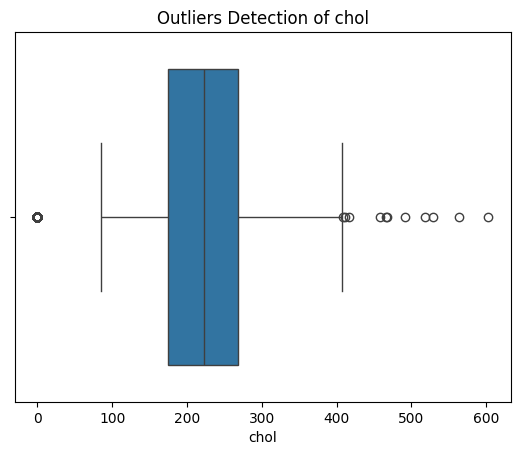

Interquartile Range(IQR) for trestbps : 20.0
Lower bound for trestbps : 90.0
Upper bound for trestbps : 170.0
Outliers in trestbps :       id  age     sex        dataset               cp  trestbps   chol    fbs  \
14    15   52    Male      Cleveland      non-anginal     172.0  199.0   True   
83    84   68    Male      Cleveland      non-anginal     180.0  274.0   True   
126  127   56  Female      Cleveland     asymptomatic     200.0  288.0   True   
172  173   59  Female      Cleveland     asymptomatic     174.0  249.0  False   
183  184   59    Male      Cleveland   typical angina     178.0  270.0  False   
188  189   54    Male      Cleveland  atypical angina     192.0  283.0  False   
201  202   64  Female      Cleveland     asymptomatic     180.0  325.0  False   
213  214   66  Female      Cleveland     asymptomatic     178.0  228.0   True   
231  232   55  Female      Cleveland     asymptomatic     180.0  327.0  False   
338  339   39    Male        Hungary  atypical angina    

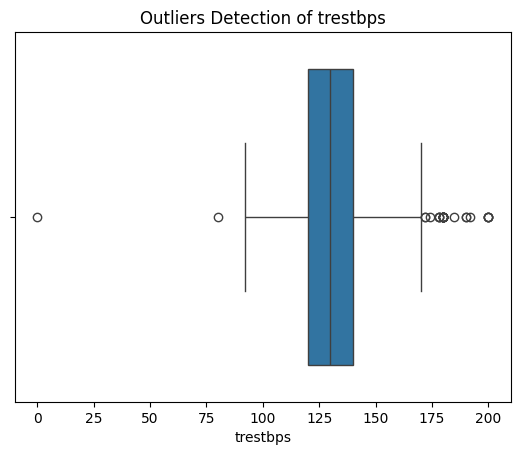

In [261]:

def detect_outliers(df,metrics):
    print("Outliers Detection:")    
    for data in metrics:
        Q1 = df[data].quantile(0.25)
        Q3 = df[data].quantile(0.75)
        IQR = Q3 - Q1
        Lower_bound = Q1 - 1.5 * IQR
        Upper_bound = Q3 + 1.5 * IQR
        Outliers = df[(df[data] < Lower_bound) | (df[data] > Upper_bound)]
        print("Interquartile Range(IQR) for",data,":",IQR)
        print("Lower bound for",data,":",Lower_bound)
        print("Upper bound for",data,":",Upper_bound)
        
        if Outliers.empty:
            print("No Outliers in",data)
        else:
            print("Outliers in",data,":",Outliers)
        print("\n")
        sns.boxplot(x=df[data],orient= 'h')
        plt.title(f"Outliers Detection of {data}")
        plt.show()
    

detect_outliers(df, ['chol','trestbps'])
        

        
        



C:\Users\ACE\AppData\Local\Temp\ipykernel_19384\2150302622.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = pd.Series([x[0], x[1]], index=['Exang:No', 'Exang:Yes'])


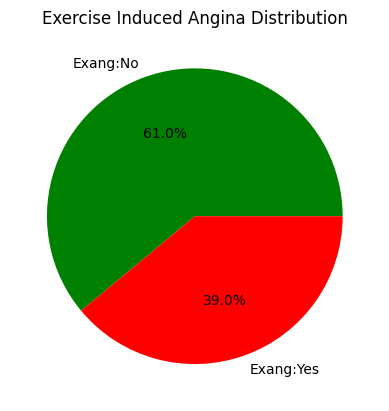

In [267]:
#3.How many patients have exercise induced angina (exang) and how many do not have exercise induced angina?

x = df['exang'].value_counts()

x = pd.Series([x[0], x[1]], index=['Exang:No', 'Exang:Yes'])

x.plot.pie(autopct = "%1.1f%%",colors=['green','red'],labels=['Exang:No','Exang:Yes'])
plt.title('Exercise Induced Angina Distribution')
plt.show()


In [268]:
#4.What are the counts of different types of chest pain (cp) in the dataset?

df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

Chest Pain Distribution:
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


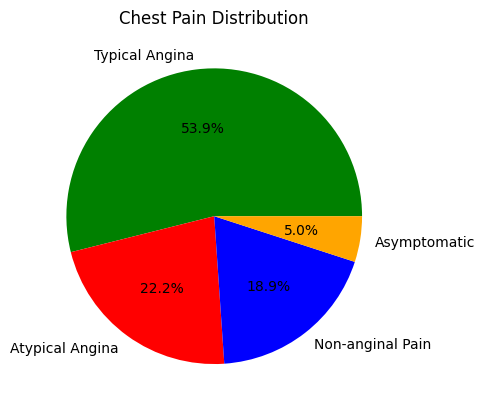

In [276]:
def chest_pain_distribution(df,cp_col):
    print("Chest Pain Distribution:")
    print(df[cp_col].value_counts())
    
    df[cp_col].value_counts().plot.pie(
        autopct="%1.1f%%",
        colors=['green','red','blue','orange'],
        labels=['Typical Angina','Atypical Angina','Non-anginal Pain','Asymptomatic']
    )
    plt.title('Chest Pain Distribution')
    plt.ylabel('')
    plt.show()

chest_pain_distribution(df,'cp')

Comparing Cholesterol Levels:
num
0    227.905612
1    195.255814
2    143.859813
3    159.716981
4    192.148148
Name: chol, dtype: float64


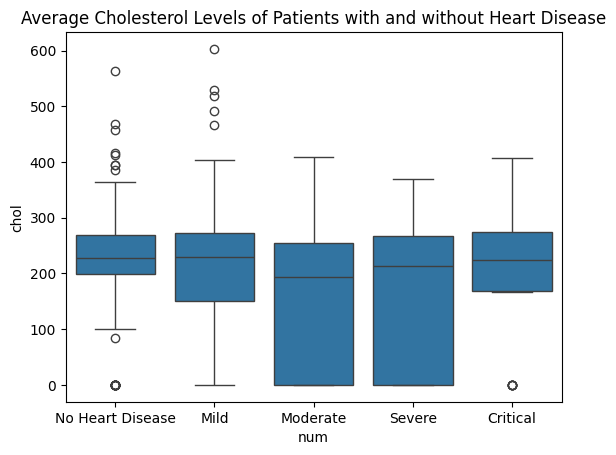

In [281]:
#5.Compare the average cholesterol levels of patients with and without heart disease?

def compare_chol_levels(df, target_col, chol_col):
    print("Comparing Cholesterol Levels:")
    print(df.groupby(target_col)[chol_col].mean()) #groupby is used to split the data into groups based on some criteria
    
    
    
    sns.boxplot(data=df, x=target_col, y=chol_col)
    plt.title("Average Cholesterol Levels of Patients with and without Heart Disease")
    plt.xticks([0, 1, 2, 3, 4], ['No Heart Disease', 'Mild', 'Moderate', 'Severe', 'Critical']) #xticks is used to set the x-axis labels and get from the column
    plt.show()

compare_chol_levels(df, 'num', 'chol')

In [284]:
#Feature Engineering

#1. Encoding Categorical Variables
#encoding catergorical variables using LabelEncoder is used to convert categorical data into numerical data

def encode_categorical_variables(df, cat_cols):
    le = LabelEncoder()
    for col in cat_cols:
        df[col] = le.fit_transform(df[col])
    return df

encode_categorical_variables(df, ['cp', 'restecg', 'slope', 'thal'])





,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,3,145.0,233.0,True,0,150.0,False,2.3,0,0.0,0,0
1,2,67,Male,Cleveland,0,160.0,286.0,False,0,108.0,True,1.5,1,3.0,1,2
2,3,67,Male,Cleveland,0,120.0,229.0,False,0,129.0,True,2.6,1,2.0,2,1
3,4,37,Male,Cleveland,2,130.0,250.0,False,1,187.0,False,3.5,0,0.0,1,0
4,5,41,Female,Cleveland,1,130.0,204.0,False,0,172.0,False,1.4,2,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,0,127.0,333.0,True,2,154.0,False,0.0,3,NaN,3,1
916,917,62,Male,VA Long Beach,3,NaN,139.0,False,2,NaN,NaN,NaN,3,NaN,3,0
917,918,55,Male,VA Long Beach,0,122.0,223.0,True,2,100.0,False,0.0,3,NaN,0,2
918,919,58,Male,VA Long Beach,0,NaN,385.0,True,0,NaN,NaN,NaN,3,NaN,3,0


In [285]:
#2. Feature Scaling 
#feature scaling is used to standardize the range of independent variables or features of data using StandardScaler it is used to normalize the data withing a particular range

def feature_scaling(df,feature_cols):
    scaler = StandardScaler()
    for col in feature_cols:
        df[col] = scaler.fit_transform(df[[col]])   
        return df
feature_scaling(df,['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca'])
    

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,1.007386,Male,Cleveland,3,145.0,233.0,True,0,150.0,False,2.3,0,0.0,0,0
1,2,1.432034,Male,Cleveland,0,160.0,286.0,False,0,108.0,True,1.5,1,3.0,1,2
2,3,1.432034,Male,Cleveland,0,120.0,229.0,False,0,129.0,True,2.6,1,2.0,2,1
3,4,-1.752828,Male,Cleveland,2,130.0,250.0,False,1,187.0,False,3.5,0,0.0,1,0
4,5,-1.328180,Female,Cleveland,1,130.0,204.0,False,0,172.0,False,1.4,2,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,0.051927,Female,VA Long Beach,0,127.0,333.0,True,2,154.0,False,0.0,3,NaN,3,1
916,917,0.901224,Male,VA Long Beach,3,NaN,139.0,False,2,NaN,NaN,NaN,3,NaN,3,0
917,918,0.158089,Male,VA Long Beach,0,122.0,223.0,True,2,100.0,False,0.0,3,NaN,0,2
918,919,0.476575,Male,VA Long Beach,0,NaN,385.0,True,0,NaN,NaN,NaN,3,NaN,3,0


In [290]:
#Model Training and Evaluation


# Assuming df is already defined and contains the data
# Convert categorical variables to numeric using pd.get_dummies
df_encoded = pd.get_dummies(df.drop(columns=['num']))

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Convert the scaled data back to a DataFrame if needed
df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)

In [299]:
from sklearn.impute import SimpleImputer

# Split the data into training and testing sets

x = df_scaled
y = df['num']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)


x_train, x_test, y_train, y_test = train_test_split(x_imputed, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_accuracy = rf.score(x_test, y_test)


svm = SVC()
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_accuracy = svm.score(x_test, y_test)


mlp=MLPClassifier(max_iter=1000)
mlp.fit(x_train,y_train)
mlp_pred=mlp.predict(x_test)
mlp_accuracy=mlp.score(x_test,y_test)



model_accuracies = {
    'Random Forest': rf_accuracy,
    'SVM': svm_accuracy,
    'MLP': mlp_accuracy
}

pd.DataFrame(model_accuracies, index=['Accuracy'])


e:\Prithvi Migration\python\Exploratory Data Analysis and Machine Learning for Heart Disease Classification\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,Random Forest,SVM,MLP
Accuracy,0.592391,0.538043,0.576087
